Importamos las dependencias

In [70]:
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Cargamos desde el repositorio de github los datos

In [71]:
url = 'https://github.com/Alf-caput/P1_MineriaDeDatos/raw/main/P3_ReduccionDimensionalidad/USA.xlsx'
df = pd.read_excel(url)
df.head()

,Ciudad,SO2,Neg.Temp,Empresas,Poblacion,Viento,Precip,Dias
0,Phoenix,10.0,70.3,213.0,582.0,6.0,7.05,36.0
1,Little Rock,13.0,61.0,91.0,132.0,8.2,48.52,100.0
2,San Francisco,12.0,56.7,453.0,716.0,8.7,20.66,67.0
3,Denver,17.0,51.9,454.0,515.0,9.0,12.95,86.0
4,Hartford,56.0,49.1,412.0,158.0,9.0,43.37,127.0


Tamaño del dataframe:

In [72]:
df.shape

(41, 8)

Se trata de un set de datos sobre ciudades, las variables del mismo son:

In [73]:
df.columns

Index(['Ciudad', 'SO2', 'Neg.Temp', 'Empresas', 'Poblacion', 'Viento',
       'Precip', 'Dias'],
      dtype='object')

No contamos con documentación, pero parece que tiene que ver con mediciones del ambiente y demografía en ciudades.\
Podemos tratar de interpretar que pueden significar:
- Ciudad, nombre de ciudad
- SO2, concentración dióxido de azufre en el aire
- Neg.Temp, temperatura Fahrenheit
- Empresas, número de empresas
- Poblacion, dato relacionado con la población de la ciudad (no puede ser el número de habitantes)
- Viento, velocidad del viento
- Precip, precipitaciones
- Dias, número de días

Comprobamos la existencia de valores NA o nulos

In [74]:
count_df = pd.DataFrame({
    'Valores NA': df.isna().sum(),
    'Valores NULL': df.isnull().sum(),
})
count_df

,Valores NA,Valores NULL
Ciudad,0,0
SO2,0,0
Neg.Temp,0,0
Empresas,0,0
Poblacion,0,0
Viento,0,0
Precip,0,0
Dias,0,0


Comprobamos el tipo de dato de cada columna

In [75]:
df.dtypes

Ciudad        object
SO2          float64
Neg.Temp     float64
Empresas     float64
Poblacion    float64
Viento       float64
Precip       float64
Dias         float64
dtype: object

Nos fijamos que son float64 excepto los valores que toma la variable ciudad que son strings (pandas por defecto considera strings como tipo obj)\
A simple vista parece que las ciudades del dataset son únicas, lo podemos comprobar:

In [76]:
df.loc[:, 'Ciudad'].nunique() == len(df.loc[:, 'Ciudad'])

True

Utilizaremos el nombre de la ciudad como índice de fila (es conveniente para estandarizar el resto de variables)

In [77]:
df = df.set_index('Ciudad')
df.head()

,SO2,Neg.Temp,Empresas,Poblacion,Viento,Precip,Dias
Ciudad,,,,,,,
Phoenix,10.0,70.3,213.0,582.0,6.0,7.05,36.0
Little Rock,13.0,61.0,91.0,132.0,8.2,48.52,100.0
San Francisco,12.0,56.7,453.0,716.0,8.7,20.66,67.0
Denver,17.0,51.9,454.0,515.0,9.0,12.95,86.0
Hartford,56.0,49.1,412.0,158.0,9.0,43.37,127.0


Para hacernos una idea de los datos y ver rangos usamos .describe()

In [78]:
# Remove count and transpose for clearer output
df.describe().drop('count').T

,mean,std,min,25%,50%,75%,max
SO2,30.048780,23.472272,8.00,13.00,26.00,35.00,110.0
Neg.Temp,55.763415,7.227716,43.50,50.60,54.60,59.30,75.5
Empresas,463.097561,563.473948,35.00,181.00,347.00,462.00,3344.0
Poblacion,608.609756,579.113023,71.00,299.00,515.00,717.00,3369.0
Viento,9.443902,1.428644,6.00,8.70,9.30,10.60,12.7
Precip,36.769024,11.771550,7.05,30.96,38.74,43.11,59.8
Dias,113.902439,26.506419,36.00,103.00,115.00,128.00,166.0


### 1.- (1 punto) Estandarizar los datos 

Estandarizamos el dataframe, para pasar todas las variables al mismo rango

In [79]:
from sklearn.preprocessing import StandardScaler

# Inicializar el StandardScaler
scaler = StandardScaler()

# Ajustar el scaler al conjunto de datos y transformar los datos
df_std = scaler.fit_transform(df)

# Convertir los datos estandarizados de nuevo a un DataFrame
df_std = pd.DataFrame(df_std, columns=df.columns, index=df.index)

# Imprimir el DataFrame estandarizado
df_std.head()

,SO2,Neg.Temp,Empresas,Poblacion,Viento,Precip,Dias
Ciudad,,,,,,,
Phoenix,-0.864758,2.036213,-0.449363,-0.046520,-2.440555,-2.556012,-2.975514
Little Rock,-0.735360,0.733515,-0.668567,-0.833224,-0.881504,1.010653,-0.531009
San Francisco,-0.778493,0.131192,-0.018143,0.187743,-0.527174,-1.385471,-1.791457
Denver,-0.562829,-0.541168,-0.016346,-0.163651,-0.314576,-2.048577,-1.065744
Hartford,1.119347,-0.933378,-0.091810,-0.787770,-0.314576,0.567723,0.500266


Podemos generar estadísticas con .describe().\
(Para que se muestren resultados con 3 decimales se usa un context manager que cambia la configuración del display y una vez se termina el bloque with devuelve a la configuración inicial)

In [80]:
class NoScientificNotation:
    def __enter__(self):
        # Save the original configuration
        self.original_config = pd.get_option('display.float_format')
        # Set the display format without scientific notation
        pd.set_option('display.float_format', lambda x: '%.3f' % x)
    
    def __exit__(self, exc_type, exc_value, traceback):
        # Restore the original configuration
        pd.set_option('display.float_format', self.original_config)

with NoScientificNotation():
    # Transpose dataframe of statistics
    print(df_std.describe().drop('count').T)

            mean   std    min    25%    50%    75%   max
SO2        0.000 1.012 -0.951 -0.735 -0.175  0.214 3.449
Neg.Temp   0.000 1.012 -1.718 -0.723 -0.163  0.495 2.765
Empresas  -0.000 1.012 -0.769 -0.507 -0.209 -0.002 5.176
Poblacion -0.000 1.012 -0.940 -0.541 -0.164  0.189 4.826
Viento     0.000 1.012 -2.441 -0.527 -0.102  0.819 2.307
Precip     0.000 1.012 -2.556 -0.500  0.170  0.545 1.981
Dias      -0.000 1.012 -2.976 -0.416  0.042  0.538 1.990


Vemos que efectivamente las variables se encuentran en un rango con media 0 y desviación típica 1.(No son exactos por problemas de redondeo)

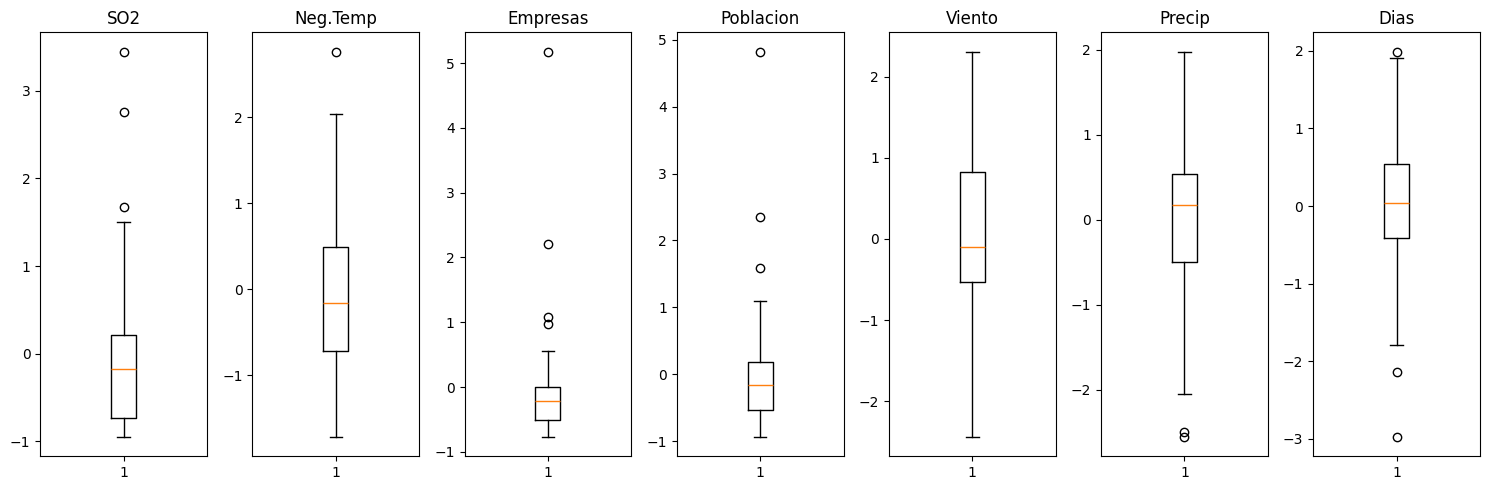

In [81]:
# Crear subplots
fig, axs = plt.subplots(nrows=1, ncols=len(df_std.columns), figsize=(15, 5))

# Iterar sobre cada columna y crear un boxplot
for i, columna in enumerate(df_std.columns):
    axs[i].boxplot(df_std[columna])
    axs[i].set_title(columna)

# Ajustar el diseño
plt.tight_layout()

# Mostrar el gráfico
plt.show()


### 2.- (1 punto) Obtención de autovalores y autovectores

In [82]:
df_std.head()

,SO2,Neg.Temp,Empresas,Poblacion,Viento,Precip,Dias
Ciudad,,,,,,,
Phoenix,-0.864758,2.036213,-0.449363,-0.046520,-2.440555,-2.556012,-2.975514
Little Rock,-0.735360,0.733515,-0.668567,-0.833224,-0.881504,1.010653,-0.531009
San Francisco,-0.778493,0.131192,-0.018143,0.187743,-0.527174,-1.385471,-1.791457
Denver,-0.562829,-0.541168,-0.016346,-0.163651,-0.314576,-2.048577,-1.065744
Hartford,1.119347,-0.933378,-0.091810,-0.787770,-0.314576,0.567723,0.500266


In [83]:
df_corr = df_std.corr()
df_corr

,SO2,Neg.Temp,Empresas,Poblacion,Viento,Precip,Dias
SO2,1.000000,-0.433600,0.644769,0.493780,0.094690,0.054294,0.369564
Neg.Temp,-0.433600,1.000000,-0.190042,-0.062678,-0.349740,0.386253,-0.430242
Empresas,0.644769,-0.190042,1.000000,0.955269,0.237947,-0.032417,0.131829
Poblacion,0.493780,-0.062678,0.955269,1.000000,0.212644,-0.026119,0.042083
Viento,0.094690,-0.349740,0.237947,0.212644,1.000000,-0.012994,0.164106
Precip,0.054294,0.386253,-0.032417,-0.026119,-0.012994,1.000000,0.496097
Dias,0.369564,-0.430242,0.131829,0.042083,0.164106,0.496097,1.000000


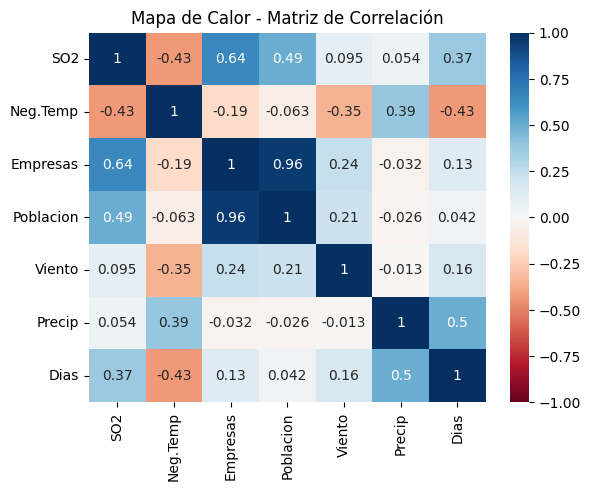

In [98]:
import seaborn as sns
sns.heatmap(df_corr, cmap='RdBu', vmin=-1, vmax=1, annot=True)
plt.title('Mapa de Calor - Matriz de Correlación')
plt.show()